# **Sprint2 機械学習スクラッチ入門**

### **【問題1】train_test_splitのスクラッチ**

In [56]:
# 実験の場1

import numpy as np
import random

train_size = 0.8
x = np.array([[1, 2], [1, 5], [4, 9], [3, 6], [3, 4], [2, 9]])
y = np.array([0, 1, 0, 0, 1, 0])

l = list(np.arange(len(x)))

num = round(len(x) * train_size)
l1 = random.sample(l, num)

set_l2 = set(l) - set(l1)
l2 = list(set_l2)

train_x_list = []
train_y_list = []
for i in l1:
    train_x_list.append(x[i])
    train_y_list.append(y[i])

test_x_list = []
test_y_list = []
for j in l2:
    test_x_list.append(x[j])
    test_y_list.append(y[j])
    
x_train = np.array(train_x_list)
y_train = np.array(train_y_list)
x_test = np.array(test_x_list)
y_test = np.array(test_y_list)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[3 6]
 [1 2]
 [4 9]
 [1 5]
 [3 4]]
[0 0 0 1 1]
[[2 9]]
[0]


In [57]:
# 実験の場2

x = np.array([[1, 2], [1, 5], [4, 9], [3, 6], [3, 4], [2, 9]])
l = list(np.arange(len(x)))
num = round(len(x) * train_size)
l1 = random.sample(l, num)

set(l) - set(l1)

{2}

In [58]:
import numpy as np
import random


def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    
    n_arrays = len(X)
    
    # 配列が空の場合はエラーを出す
    if n_arrays == 0:
        raise ValueError('At least one array required as input')
        
    train_size = train_size
    
    # 配列の要素数
    l = list(np.arange(n_arrays))
    
    # X_trainのサイズ
    train_num = round(n_arrays * train_size)
    
    # 0から配列の要素数までで、重複を許さずにX_trainのサイズ分インデックスを取得
    l1 = random.sample(l, train_num)
    
    # X_trainで選ばれなかったものをX_testのインデックスで使うため集合に直して差をとる
    set_l2 = set(l) - set(l1)
    l2 = list(set_l2)
    
    # まずはリストで取得する
    train_x_list = []
    train_y_list = []
    for i in l1:
        train_x_list.append(X[i])
        train_y_list.append(y[i])
        
    test_x_list = []
    test_y_list = []
    for j in l2:
        test_x_list.append(X[j])
        test_y_list.append(y[j])
    
    # リストをNumPy配列に変換
    X_train = np.array(train_x_list)
    X_test = np.array(test_x_list)
    y_train = np.array(train_y_list)
    y_test = np.array(test_y_list)

    return X_train, X_test, y_train, y_test

### **【問題2】分類問題を解くコードの作成**

### **分類問題**

### **[data set 1]**

**Iris dataset**

**ロジスティック回帰**

In [66]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
X = X[50:]
y = y[50:]

In [67]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8,)

In [68]:
from sklearn import linear_model

clf1 = linear_model.SGDClassifier(loss='log')
clf1.fit(X_train, y_train)
clf1.predict(X_test)

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2])

In [69]:
clf1.score(X_test, y_test)

0.9

**SVM**

In [70]:
from sklearn.svm import SVC

clf2 = SVC()
clf2.fit(X_train, y_train)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [71]:
clf2.predict(X_test)

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
clf2.score(X_test, y_test)

0.95

**決定木**

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier()
clf3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
clf3.predict(X_test)

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2])

In [78]:
clf3.score(X_test, y_test)

0.85

### **[data set 2]**

In [107]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

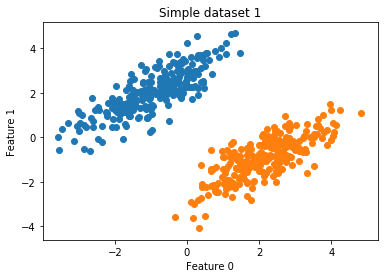

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Simple dataset 1')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show();

In [83]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)

**ロジスティック回帰**

In [84]:
lr = linear_model.SGDClassifier(loss='log')
lr.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
lr.predict(X_test)

array([-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1])

In [86]:
lr.score(X_test, y_test)

1.0

**SVM**

In [87]:
svm = SVC()
svm.fit(X_train, y_train)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
svm.predict(X_test)

array([-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1])

In [89]:
svm.score(X_test, y_test)

1.0

**決定木**

In [90]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
tree.predict(X_test)

array([-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1])

In [92]:
tree.score(X_test, y_test)

1.0

### **[data set 3]**

In [109]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

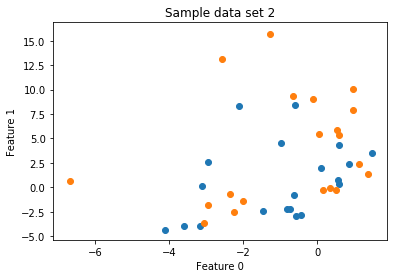

In [110]:
plt.title('Sample data set 2')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.show()

**ロジスティック回帰**

In [111]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)

lr = linear_model.SGDClassifier(loss='log')
lr.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:
lr.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1])

In [113]:
lr.score(X_test, y_test)

0.5

**SVM**

In [114]:
svm = SVC()
svm.fit(X_train, y_train)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [115]:
svm.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1])

In [116]:
svm.score(X_test, y_test)

0.625

**決定木**

In [117]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [118]:
tree.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1])

In [119]:
tree.score(X_test, y_test)

0.75

### **【問題3】回帰問題を解くコードの作成**

In [226]:
import pandas as pd

df = pd.read_csv('train.csv')

In [227]:
X = df[['GrLivArea']].values
y = df[['SalePrice']].values

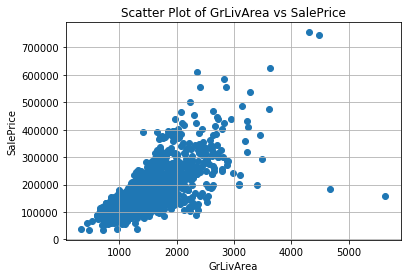

In [228]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

In [229]:
df[['GrLivArea', 'SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


In [230]:
# 訓練データと検証データに分割

X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8)

In [231]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [232]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(X_train_scaled, y_train)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [233]:
print('coefficient = ', sgdr.coef_[0])
print('intercept = ', sgdr.intercept_)

coefficient =  552180.9695932204
intercept =  [58736.56100372]


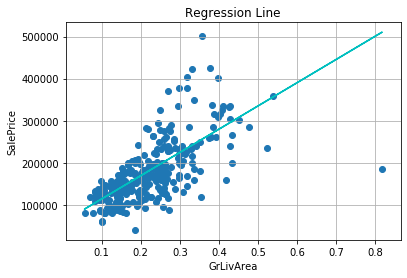

In [234]:
plt.scatter(X_test_scaled, y_test)

plt.plot(X_test_scaled, sgdr.predict(X_test_scaled), c='c')

plt.title('Regression Line')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.grid()
plt.show();

In [235]:
sgdr.score(X_test_scaled, y_test)

0.42454825268874496

In [236]:
X1 = df[['YearBuilt']].values

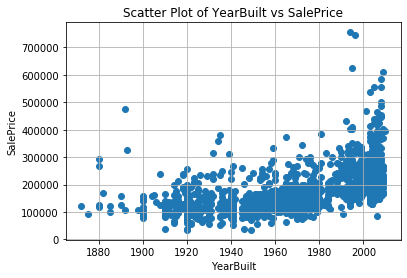

In [237]:
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.title('Scatter Plot of YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

In [238]:
df[['YearBuilt', 'SalePrice']].corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


In [239]:
# 訓練データと検証データに分割

X1_train, X1_test, y_train, y_test = scratch_train_test_split(X1, y, train_size=0.8)

In [240]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [241]:
sgdr1 = SGDRegressor()
sgdr1.fit(X1_train_scaled, y_train)

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [242]:
print('coefficient = ', sgdr1.coef_[0])
print('intercept = ', sgdr1.intercept_)

coefficient =  180847.18391921083
intercept =  [51707.97610478]


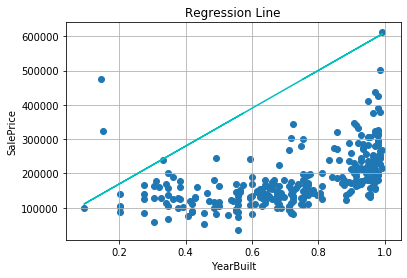

In [244]:
plt.scatter(X1_test_scaled, y_test)

plt.plot(X1_test_scaled, sgdr.predict(X1_test_scaled), c='c')

plt.title('Regression Line')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.grid()
plt.show();

In [245]:
sgdr1.score(X1_test_scaled, y_test)

0.25044633621221934